In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [210]:
df=pd.read_csv('ipl_matches.csv')

In [5]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## Drop id-umpire1-umpire2-umpire3

In [12]:
df = df.drop('id',axis=1)
df = df.drop('umpire1', axis=1)
df = df.drop('umpire2', axis=1)
df = df.drop('umpire3', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season           756 non-null    object
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
dtypes: int64(3), object(11)
memory usage: 82.8+ KB


In [16]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

## Replace Bangalore-Bengaluru

In [19]:
df['city']=df['city'].replace('Bangalore','Bengaluru')

In [21]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

## Fill nan-Sharjah

In [24]:
df['city']=df['city'].fillna('Sharjah')

In [26]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Mohali'], dtype=object)

In [28]:
df['team1'].value_counts()

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: count, dtype: int64

In [30]:
df=df.replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [32]:
df['team1'].value_counts()

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: count, dtype: int64

## Replace nan - Match tie

In [35]:
df[df['winner'].isna()]

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,IPL-2015,Bengaluru,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,IPL-2015,Bengaluru,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


In [37]:
df['winner']=df['winner'].fillna('Match Tie')

## Replace nan in Player of match - None

In [40]:
df['player_of_match']=df['player_of_match'].fillna('None')

## Date formatting

In [43]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)

In [45]:
df.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,IPL-2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [47]:
df.isnull().sum()

Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Season           756 non-null    object        
 1   city             756 non-null    object        
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   dl_applied       756 non-null    int64         
 9   winner           756 non-null    object        
 10  win_by_runs      756 non-null    int64         
 11  win_by_wickets   756 non-null    int64         
 12  player_of_match  756 non-null    object        
 13  venue            756 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(10)

# EDA

 ## Team Performance - Wins per Team

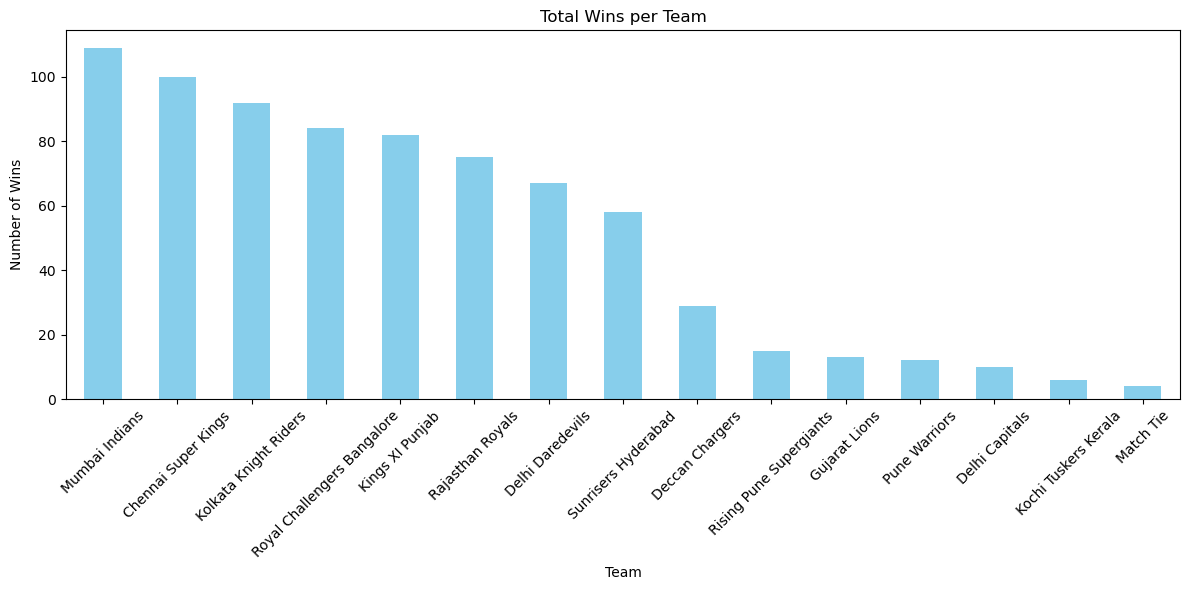

In [53]:
plt.figure(figsize=(12,6))
df['winner'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Wins per Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Toss winner = Match winner?

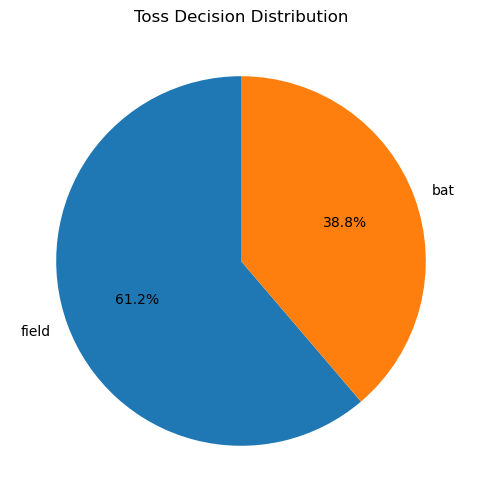

In [55]:
plt.figure(figsize=(6, 6))
toss = df['toss_decision'].value_counts()
plt.pie(toss, labels = toss.index,autopct='%1.1f%%', startangle=90)
plt.title('Toss Decision Distribution')
plt.ylabel('')
plt.show()

## Top Venues

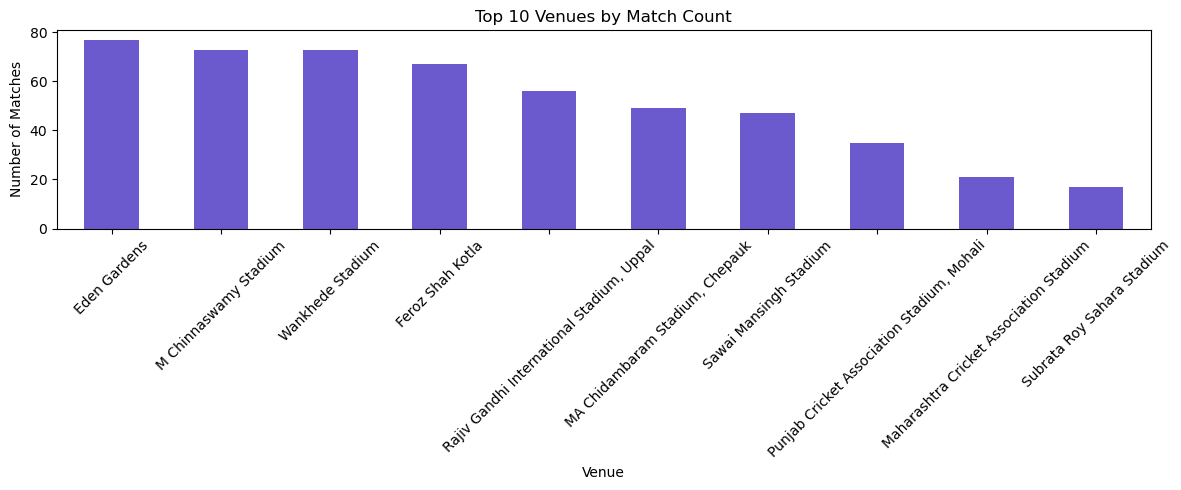

In [57]:
plt.figure(figsize=(12,5))
df['venue'].value_counts().head(10).plot(kind='bar', color='slateblue')
plt.title('Top 10 Venues by Match Count')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [64]:
X = df[['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue']]
Y = df['winner']

In [66]:
X_encoder = OneHotEncoder()
X_encoded = X_encoder.fit_transform(X)
Y_encoder = LabelEncoder()
Y_encoded = Y_encoder.fit_transform(Y)

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X_encoded,Y_encoded,test_size=0.20,random_state=42)

# SMOTE Technic
## SMOTE Technic were used after the run model 

In [214]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
X_train,X_test,Y_train,Y_test = train_test_split(X_train_smote,Y_train_smote,test_size=0.20,random_state=42)

# Logistic Model

In [71]:
logistic =  LogisticRegression(max_iter=1000)

In [73]:
logistic.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [75]:
logistic_model_test = logistic.predict(X_test)
logistic_model_train = logistic.predict(X_train)

In [77]:
print(classification_report(Y_test,logistic_model_test))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        26
           1       0.40      0.29      0.33         7
           2       0.00      0.00      0.00         1
           3       0.20      0.22      0.21         9
           4       1.00      0.75      0.86         4
           5       0.32      0.41      0.36        17
           6       0.00      0.00      0.00         0
           7       0.61      0.50      0.55        22
           9       0.56      0.79      0.65        19
          10       0.00      0.00      0.00         4
          11       0.62      0.71      0.67        14
          12       0.00      0.00      0.00         5
          13       0.40      0.50      0.44        12
          14       0.43      0.25      0.32        12

    accuracy                           0.51       152
   macro avg       0.37      0.37      0.36       152
weighted avg       0.48      0.51      0.49       152



In [79]:
print(classification_report(Y_train,logistic_model_train))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        74
           1       0.84      0.73      0.78        22
           2       1.00      0.78      0.88         9
           3       0.80      0.74      0.77        58
           4       0.86      0.67      0.75         9
           5       0.81      0.78      0.80        65
           6       1.00      0.83      0.91         6
           7       0.86      0.81      0.84        70
           8       0.00      0.00      0.00         4
           9       0.77      0.88      0.82        90
          10       1.00      0.38      0.55         8
          11       0.78      0.85      0.81        61
          12       0.86      0.60      0.71        10
          13       0.70      0.72      0.71        72
          14       0.83      0.85      0.84        46

    accuracy                           0.80       604
   macro avg       0.79      0.70      0.73       604
weighted avg       0.80   

# After Tuning

In [126]:
log_params = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 500, 1000]
}

In [128]:
grid_model_log = GridSearchCV(
    estimator=logistic,
    param_grid=log_params,
    cv=5,
    scoring='f1_weighted',verbose=2,
    n_jobs=-1
)

In [130]:
grid_model_log.fit(X_train_smote,Y_train_smote)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [200, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1_weighted', verbose=2)

In [131]:
Grid_Model_log_test = grid_model_log.predict(X_test)
Grid_Model_log_train = grid_model_log.predict(X_train)

In [132]:
print(classification_report(Y_test,Grid_Model_log_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        17
           3       0.81      0.87      0.84        15
           4       1.00      1.00      1.00        17
           5       0.80      0.94      0.86        17
           6       1.00      1.00      1.00        17
           7       1.00      0.73      0.84        22
           8       1.00      1.00      1.00        24
           9       1.00      0.88      0.94        17
          10       1.00      1.00      1.00        18
          11       0.89      0.89      0.89        18
          12       0.95      1.00      0.98        20
          13       0.69      0.79      0.73        14
          14       0.95      1.00      0.98        20

    accuracy                           0.94       270
   macro avg       0.94      0.94      0.93       270
weighted avg       0.94   

In [133]:
print(classification_report(Y_train,Grid_Model_log_train))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        73
           1       0.99      1.00      0.99        73
           2       1.00      1.00      1.00        73
           3       0.89      0.89      0.89        75
           4       0.97      1.00      0.99        73
           5       0.90      0.89      0.90        73
           6       1.00      1.00      1.00        73
           7       0.87      0.90      0.88        68
           8       0.96      1.00      0.98        66
           9       0.83      0.86      0.85        73
          10       1.00      1.00      1.00        72
          11       0.86      0.88      0.87        72
          12       1.00      1.00      1.00        70
          13       0.92      0.72      0.81        76
          14       0.96      0.94      0.95        70

    accuracy                           0.94      1080
   macro avg       0.94      0.94      0.94      1080
weighted avg       0.94   

# KNN Model

In [81]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [83]:
knn_model_test = KNN.predict(X_test)
knn_model_train = KNN.predict(X_train)

In [85]:
print(classification_report(Y_test,knn_model_test))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.27      0.44      0.33         9
           4       0.33      0.25      0.29         4
           5       0.29      0.29      0.29        17
           6       0.00      0.00      0.00         0
           7       0.57      0.59      0.58        22
           9       0.50      0.58      0.54        19
          10       0.00      0.00      0.00         4
          11       0.64      0.50      0.56        14
          12       0.00      0.00      0.00         5
          13       0.31      0.42      0.36        12
          14       0.56      0.42      0.48        12

    accuracy                           0.44       152
   macro avg       0.29      0.29      0.29       152
weighted avg       0.42      0.44      0.43       152



In [87]:
print(classification_report(Y_train,knn_model_train))

              precision    recall  f1-score   support

           0       0.67      0.81      0.74        74
           1       0.52      0.50      0.51        22
           2       0.71      0.56      0.62         9
           3       0.62      0.69      0.65        58
           4       0.67      0.44      0.53         9
           5       0.64      0.57      0.60        65
           6       1.00      0.50      0.67         6
           7       0.70      0.83      0.76        70
           8       0.50      0.25      0.33         4
           9       0.67      0.68      0.67        90
          10       1.00      0.25      0.40         8
          11       0.66      0.61      0.63        61
          12       0.75      0.60      0.67        10
          13       0.67      0.65      0.66        72
          14       0.77      0.72      0.74        46

    accuracy                           0.67       604
   macro avg       0.70      0.58      0.61       604
weighted avg       0.67   

# After Tuning

In [142]:
KNN_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [144]:
grid_knn = GridSearchCV(
    estimator=KNN,
    param_grid=KNN_params,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [146]:
grid_knn.fit(X_train_smote,Y_train_smote)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [148]:
grid_knn_model_test = grid_knn.predict(X_test)
grid_knn_model_train = grid_knn.predict(X_train)

In [150]:
print("Best KNN Params:", grid_knn.best_params_)

Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [152]:
print(classification_report(Y_test,grid_knn_model_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        17
           3       0.87      0.87      0.87        15
           4       1.00      1.00      1.00        17
           5       0.77      1.00      0.87        17
           6       1.00      1.00      1.00        17
           7       0.91      0.91      0.91        22
           8       1.00      0.96      0.98        24
           9       0.88      0.88      0.88        17
          10       1.00      1.00      1.00        18
          11       1.00      0.78      0.88        18
          12       0.95      1.00      0.98        20
          13       0.73      0.79      0.76        14
          14       1.00      0.95      0.97        20

    accuracy                           0.94       270
   macro avg       0.94      0.93      0.93       270
weighted avg       0.94   

In [154]:
print(classification_report(Y_train,grid_knn_model_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        73
           1       0.99      1.00      0.99        73
           2       1.00      1.00      1.00        73
           3       0.92      0.89      0.91        75
           4       0.99      0.99      0.99        73
           5       0.91      0.95      0.93        73
           6       1.00      1.00      1.00        73
           7       0.85      0.93      0.89        68
           8       0.99      1.00      0.99        66
           9       0.85      0.92      0.88        73
          10       1.00      1.00      1.00        72
          11       0.91      0.86      0.89        72
          12       1.00      1.00      1.00        70
          13       0.88      0.75      0.81        76
          14       0.99      0.94      0.96        70

    accuracy                           0.95      1080
   macro avg       0.95      0.95      0.95      1080
weighted avg       0.95   

# SVM Model

In [89]:
svm_clf = SVC()
svm_clf.fit(X_train,Y_train)

SVC()

In [91]:
svm_model_test = svm_clf.predict(X_test)
svm_model_train = svm_clf.predict(X_train)

In [93]:
print(classification_report(Y_test,svm_model_test))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        26
           1       0.33      0.29      0.31         7
           2       0.00      0.00      0.00         1
           3       0.36      0.56      0.43         9
           4       0.80      1.00      0.89         4
           5       0.26      0.29      0.28        17
           6       0.00      0.00      0.00         0
           7       0.67      0.55      0.60        22
           9       0.50      0.63      0.56        19
          10       0.00      0.00      0.00         4
          11       0.77      0.71      0.74        14
          12       0.00      0.00      0.00         5
          13       0.47      0.67      0.55        12
          14       0.56      0.42      0.48        12

    accuracy                           0.53       152
   macro avg       0.38      0.41      0.39       152
weighted avg       0.51      0.53      0.51       152



In [95]:
print(classification_report(Y_train,svm_model_train))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        74
           1       0.78      0.82      0.80        22
           2       1.00      0.78      0.88         9
           3       0.80      0.78      0.79        58
           4       0.78      0.78      0.78         9
           5       0.83      0.74      0.78        65
           6       1.00      0.83      0.91         6
           7       0.86      0.86      0.86        70
           8       0.00      0.00      0.00         4
           9       0.75      0.92      0.83        90
          10       1.00      0.25      0.40         8
          11       0.78      0.82      0.80        61
          12       0.78      0.70      0.74        10
          13       0.72      0.75      0.73        72
          14       0.85      0.87      0.86        46

    accuracy                           0.81       604
   macro avg       0.79      0.72      0.73       604
weighted avg       0.81   

# After Tuning

In [156]:
SVM_params = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [158]:
grid_svm = GridSearchCV(
    estimator=svm_clf,
    param_grid=SVM_params,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [160]:
grid_svm.fit(X_train_smote,Y_train_smote)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [162]:
grid_svm_model_test = grid_svm.predict(X_test)
grid_svm_model_train = grid_svm.predict(X_train)

In [164]:
print("Best KNN Params:", grid_svm.best_params_)

Best KNN Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [166]:
print(classification_report(Y_test,grid_svm_model_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        17
           3       0.93      0.87      0.90        15
           4       1.00      1.00      1.00        17
           5       0.80      0.94      0.86        17
           6       1.00      1.00      1.00        17
           7       0.94      0.77      0.85        22
           8       1.00      1.00      1.00        24
           9       1.00      0.88      0.94        17
          10       1.00      1.00      1.00        18
          11       0.89      0.89      0.89        18
          12       0.95      1.00      0.98        20
          13       0.62      0.71      0.67        14
          14       0.95      1.00      0.98        20

    accuracy                           0.94       270
   macro avg       0.94      0.93      0.93       270
weighted avg       0.94   

In [168]:
print(classification_report(Y_train,grid_svm_model_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        73
           1       0.99      1.00      0.99        73
           2       1.00      1.00      1.00        73
           3       0.91      0.89      0.90        75
           4       0.97      1.00      0.99        73
           5       0.91      0.92      0.91        73
           6       1.00      1.00      1.00        73
           7       0.86      0.94      0.90        68
           8       0.96      1.00      0.98        66
           9       0.87      0.84      0.85        73
          10       1.00      1.00      1.00        72
          11       0.88      0.89      0.88        72
          12       1.00      1.00      1.00        70
          13       0.92      0.78      0.84        76
          14       0.96      0.94      0.95        70

    accuracy                           0.94      1080
   macro avg       0.94      0.94      0.94      1080
weighted avg       0.94   

# Decision Tree

In [97]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [99]:
DT_model_test = DT_clf.predict(X_test)
DT_model_train = DT_clf.predict(X_train)

In [101]:
print(classification_report(Y_test,DT_model_test))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64        26
           1       0.29      0.29      0.29         7
           2       0.00      0.00      0.00         1
           3       0.20      0.33      0.25         9
           4       1.00      1.00      1.00         4
           5       0.53      0.47      0.50        17
           6       0.00      0.00      0.00         0
           7       0.67      0.73      0.70        22
           9       0.53      0.53      0.53        19
          10       0.00      0.00      0.00         4
          11       0.62      0.71      0.67        14
          12       1.00      0.60      0.75         5
          13       0.38      0.50      0.43        12
          14       0.86      0.50      0.63        12

    accuracy                           0.55       152
   macro avg       0.48      0.45      0.46       152
weighted avg       0.58      0.55      0.56       152



In [103]:
print(classification_report(Y_train,DT_model_train))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        74
           1       0.92      1.00      0.96        22
           2       1.00      1.00      1.00         9
           3       0.84      0.90      0.87        58
           4       0.89      0.89      0.89         9
           5       0.87      0.91      0.89        65
           6       1.00      1.00      1.00         6
           7       0.90      0.89      0.89        70
           8       0.75      0.75      0.75         4
           9       0.88      0.89      0.88        90
          10       1.00      1.00      1.00         8
          11       0.89      0.80      0.84        61
          12       0.91      1.00      0.95        10
          13       0.83      0.76      0.80        72
          14       0.98      0.89      0.93        46

    accuracy                           0.89       604
   macro avg       0.90      0.91      0.91       604
weighted avg       0.89   

# After Tuning

In [170]:
DecisionTree_params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]
    }

In [172]:
grid_dt = GridSearchCV(
    estimator=DT_clf,
    param_grid=DecisionTree_params,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [174]:
grid_dt.fit(X_train_smote,Y_train_smote)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]},
             scoring='accuracy', verbose=2)

In [176]:
grid_dt_model_test = grid_dt.predict(X_test)
grid_dt_model_train = grid_dt.predict(X_train)

In [178]:
print("Best DT Params:", grid_dt.best_params_)

Best DT Params: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [180]:
grid_dt.best_score_

0.7755555555555556

In [182]:
print(classification_report(Y_test,grid_dt_model_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        17
           3       0.87      0.87      0.87        15
           4       1.00      1.00      1.00        17
           5       0.73      0.94      0.82        17
           6       1.00      1.00      1.00        17
           7       0.89      0.73      0.80        22
           8       1.00      0.96      0.98        24
           9       0.87      0.76      0.81        17
          10       1.00      1.00      1.00        18
          11       0.88      0.83      0.86        18
          12       0.95      1.00      0.98        20
          13       0.67      0.71      0.69        14
          14       1.00      0.90      0.95        20

    accuracy                           0.91       270
   macro avg       0.91      0.91      0.91       270
weighted avg       0.92   

In [184]:
print(classification_report(Y_train,grid_dt_model_train))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        73
           1       0.99      1.00      0.99        73
           2       1.00      1.00      1.00        73
           3       0.88      0.95      0.91        75
           4       0.99      0.99      0.99        73
           5       0.84      0.89      0.87        73
           6       1.00      0.97      0.99        73
           7       0.89      0.93      0.91        68
           8       0.99      1.00      0.99        66
           9       0.70      0.88      0.78        73
          10       1.00      0.99      0.99        72
          11       0.90      0.86      0.88        72
          12       1.00      0.99      0.99        70
          13       0.93      0.68      0.79        76
          14       0.98      0.87      0.92        70

    accuracy                           0.93      1080
   macro avg       0.93      0.93      0.93      1080
weighted avg       0.93   

# Random Forest

In [106]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [107]:
RF_model_test = RF_clf.predict(X_test)
RF_model_train = RF_clf.predict(X_train)

In [110]:
print(classification_report(Y_test,RF_model_test))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        26
           1       0.50      0.29      0.36         7
           2       0.00      0.00      0.00         1
           3       0.29      0.44      0.35         9
           4       1.00      0.75      0.86         4
           5       0.33      0.41      0.37        17
           6       0.00      0.00      0.00         0
           7       0.61      0.64      0.62        22
           9       0.54      0.74      0.62        19
          10       0.00      0.00      0.00         4
          11       0.69      0.64      0.67        14
          12       1.00      0.20      0.33         5
          13       0.47      0.58      0.52        12
          14       0.71      0.42      0.53        12

    accuracy                           0.55       152
   macro avg       0.49      0.41      0.42       152
weighted avg       0.57      0.55      0.54       152



In [112]:
print(classification_report(Y_train,RF_model_train))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        74
           1       0.92      1.00      0.96        22
           2       1.00      1.00      1.00         9
           3       0.90      0.81      0.85        58
           4       0.89      0.89      0.89         9
           5       0.93      0.83      0.88        65
           6       1.00      1.00      1.00         6
           7       0.91      0.87      0.89        70
           8       1.00      0.50      0.67         4
           9       0.85      0.93      0.89        90
          10       1.00      1.00      1.00         8
          11       0.84      0.87      0.85        61
          12       1.00      0.90      0.95        10
          13       0.76      0.89      0.82        72
          14       0.98      0.89      0.93        46

    accuracy                           0.89       604
   macro avg       0.93      0.89      0.90       604
weighted avg       0.89   

# After Tuning

In [220]:
RandomForest_params={
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2]
}

In [222]:
RF_random = RandomizedSearchCV(
    estimator=RF_clf,
    param_distributions=RandomForest_params,
    n_iter=50,              
    cv=5,                   
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

In [190]:
RF_random.fit(X_train_smote,Y_train_smote)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [192]:
random_grid_model_test = RF_random.predict(X_test)
random_grid_model_train = RF_random.predict(X_train)

In [194]:
print(classification_report(Y_test,random_grid_model_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        17
           3       0.93      0.87      0.90        15
           4       1.00      1.00      1.00        17
           5       0.84      0.94      0.89        17
           6       1.00      1.00      1.00        17
           7       0.94      0.77      0.85        22
           8       1.00      0.96      0.98        24
           9       0.88      0.88      0.88        17
          10       1.00      1.00      1.00        18
          11       0.89      0.94      0.92        18
          12       0.95      1.00      0.98        20
          13       0.59      0.71      0.65        14
          14       1.00      1.00      1.00        20

    accuracy                           0.93       270
   macro avg       0.93      0.93      0.93       270
weighted avg       0.94   

In [196]:
print(classification_report(Y_train, random_grid_model_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.99      0.99      0.99        73
           2       1.00      1.00      1.00        73
           3       0.91      0.91      0.91        75
           4       0.99      0.97      0.98        73
           5       0.90      0.89      0.90        73
           6       1.00      1.00      1.00        73
           7       0.91      0.90      0.90        68
           8       1.00      0.98      0.99        66
           9       0.86      0.89      0.87        73
          10       1.00      1.00      1.00        72
          11       0.85      0.93      0.89        72
          12       0.99      1.00      0.99        70
          13       0.90      0.80      0.85        76
          14       0.96      0.94      0.95        70

    accuracy                           0.94      1080
   macro avg       0.95      0.95      0.94      1080
weighted avg       0.94   

# XG-Boost

In [114]:
XGB_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [116]:
XGB_clf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [118]:
XGB_model_test = XGB_clf.predict(X_test)
XGB_model_train = XGB_clf.predict(X_train)

In [120]:
print(classification_report(Y_test,XGB_model_test))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        26
           1       0.33      0.29      0.31         7
           2       0.00      0.00      0.00         1
           3       0.25      0.33      0.29         9
           4       1.00      1.00      1.00         4
           5       0.35      0.47      0.40        17
           6       0.00      0.00      0.00         0
           7       0.59      0.59      0.59        22
           9       0.54      0.68      0.60        19
          10       0.50      0.25      0.33         4
          11       0.57      0.57      0.57        14
          12       1.00      0.60      0.75         5
          13       0.40      0.50      0.44        12
          14       0.83      0.42      0.56        12

    accuracy                           0.53       152
   macro avg       0.50      0.45      0.46       152
weighted avg       0.56      0.53      0.53       152



In [122]:
print(classification_report(Y_train,XGB_model_train))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        74
           1       0.95      0.86      0.90        22
           2       1.00      1.00      1.00         9
           3       0.94      0.78      0.85        58
           4       0.89      0.89      0.89         9
           5       0.92      0.83      0.87        65
           6       1.00      0.67      0.80         6
           7       0.88      0.86      0.87        70
           8       1.00      0.50      0.67         4
           9       0.86      0.92      0.89        90
          10       1.00      1.00      1.00         8
          11       0.80      0.92      0.85        61
          12       0.90      0.90      0.90        10
          13       0.78      0.86      0.82        72
          14       0.93      0.91      0.92        46

    accuracy                           0.88       604
   macro avg       0.92      0.86      0.88       604
weighted avg       0.88   

# After Tuning

In [198]:
XGBoost_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

In [200]:
XGBoost_random= RandomizedSearchCV(
    estimator=XGB_clf,
    param_distributions=XGBoost_params,
    n_iter=20,        
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

In [202]:
XGBoost_random.fit(X_train_smote,Y_train_smote)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [203]:
XG_pred_test = XGBoost_random.predict(X_test)
XG_pred_train = XGBoost_random.predict(X_train)

In [204]:
print(classification_report(Y_test, XG_pred_test)) 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.88      0.88      0.88        17
           2       1.00      1.00      1.00        17
           3       1.00      0.80      0.89        15
           4       1.00      1.00      1.00        17
           5       0.74      0.82      0.78        17
           6       1.00      1.00      1.00        17
           7       0.89      0.77      0.83        22
           8       1.00      0.96      0.98        24
           9       0.75      0.88      0.81        17
          10       1.00      0.94      0.97        18
          11       0.74      0.78      0.76        18
          12       0.91      1.00      0.95        20
          13       0.57      0.57      0.57        14
          14       0.95      0.95      0.95        20

    accuracy                           0.89       270
   macro avg       0.88      0.88      0.88       270
weighted avg       0.89   

In [205]:
print(classification_report(Y_train, XG_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.99      0.95      0.97        73
           2       1.00      1.00      1.00        73
           3       0.88      0.85      0.86        75
           4       0.99      0.99      0.99        73
           5       0.88      0.88      0.88        73
           6       1.00      1.00      1.00        73
           7       0.87      0.90      0.88        68
           8       1.00      0.97      0.98        66
           9       0.82      0.86      0.84        73
          10       1.00      0.97      0.99        72
          11       0.84      0.92      0.87        72
          12       0.99      1.00      0.99        70
          13       0.88      0.76      0.82        76
          14       0.93      0.94      0.94        70

    accuracy                           0.93      1080
   macro avg       0.93      0.93      0.93      1080
weighted avg       0.93   